In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [43]:
start='2011-01-01'
end='2021-12-31'

df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.849808
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.063869
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.116390
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.199144
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.190899


In [44]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.836319
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,178.799164
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,178.888916
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.712143
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.083878


In [46]:
df=df.reset_index()
df.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.849808
1,1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.063869
2,2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.116390
3,3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.199144
4,4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.190899


In [47]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,index,High,Low,Open,Close,Volume
0,0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,4,11.973214,11.889286,11.954286,11.918929,300428800.0


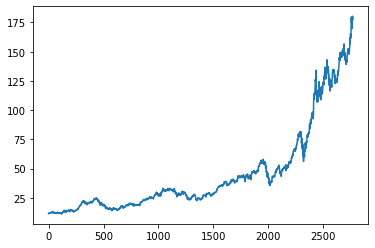

In [48]:
plt.plot(df.Close)

In [49]:
df

,index,High,Low,Open,Close,Volume
0,0,11.552857,11.475357,11.533929,11.520000,193508000.0
1,1,11.795000,11.601429,11.630000,11.770357,445138400.0
2,2,11.875000,11.719643,11.872857,11.831786,309080800.0
3,3,11.940714,11.767857,11.769643,11.928571,255519600.0
4,4,11.973214,11.889286,11.954286,11.918929,300428800.0
...,...,...,...,...,...,...
2765,2765,180.419998,177.070007,177.089996,180.330002,74919600.0
2766,2766,181.330002,178.529999,180.160004,179.289993,79144300.0
2767,2767,180.630005,178.139999,179.330002,179.380005,62348900.0
2768,2768,180.570007,178.089996,179.470001,178.199997,59773000.0


In [50]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2765    153.3444
2766    153.6667
2767    153.9991
2768    154.3202
2769    154.6399
Name: Close, Length: 2770, dtype: float64

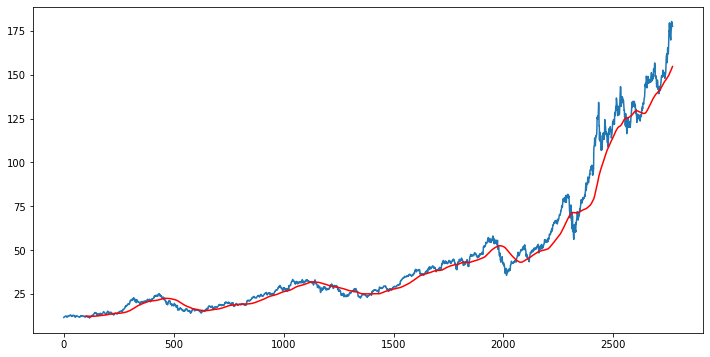

In [51]:
plt.figure(figsize = (12,6)) #moving averages
plt.plot(df.Close)
plt.plot(ma100,'r')

In [52]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2765    142.85570
2766    143.13220
2767    143.40125
2768    143.66845
2769    143.95365
Name: Close, Length: 2770, dtype: float64

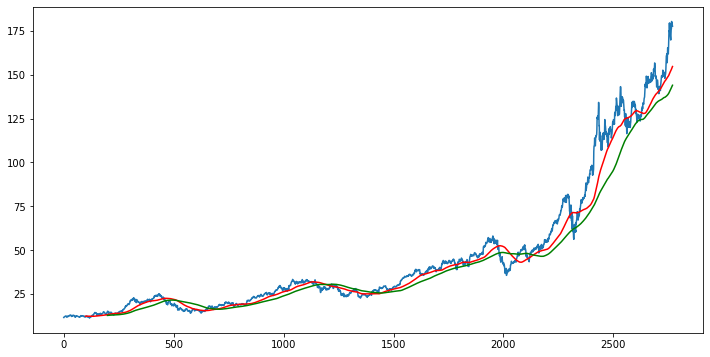

In [53]:
plt.figure(figsize = (12,6)) 
plt.plot(df.Close)
plt.plot(ma100,'r') 
plt.plot(ma200,'g') 

In [54]:
df.shape

(2770, 6)

In [55]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [56]:
data_training.head()

,Close
0,11.520000
1,11.770357
2,11.831786
3,11.928571
4,11.918929


In [57]:
data_testing.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [59]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.00564215],
       [0.01110504],
       [0.01244545],
       ...,
       [0.94528523],
       [0.97539747],
       [0.96023227]])

In [60]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

In [61]:
#ML model

In [62]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [63]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences= True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation = 'relu',return_sequences= True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80,activation = 'relu',return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [65]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 16s 195ms/step - loss: 0.0311
Epoch 2/50
58/58 [==============================] - 12s 198ms/step - loss: 0.0056
Epoch 3/50
58/58 [==============================] - 12s 207ms/step - loss: 0.0050
Epoch 4/50
58/58 [==============================] - 12s 207ms/step - loss: 0.0046
Epoch 5/50
58/58 [==============================] - 11s 192ms/step - loss: 0.0047
Epoch 6/50
58/58 [==============================] - 11s 192ms/step - loss: 0.0046
Epoch 7/50
58/58 [==============================] - 12s 213ms/step - loss: 0.0039
Epoch 8/50
58/58 [==============================] - 12s 213ms/step - loss: 0.0040
Epoch 9/50
58/58 [==============================] - 13s 225ms/step - loss: 0.0040
Epoch 10/50
58/58 [==============================] - 12s 210ms/step - loss: 0.0033
Epoch 11/50
58/58 [==============================] - 12s 214ms/step - loss: 0.0035
Epoch 12/50
58/58 [==============================] - 12s 212ms/step - loss: 0.0035
Epoch 13/50
5

In [24]:
model.save('Keras_model.h5')

In [66]:
data_testing.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [67]:
past_100_days = data_training.tail(100)

In [68]:
final_df = past_100_days.append(data_testing,ignore_index=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_1120\3976939425.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [71]:
final_df.head()

,Close
0,41.310001
1,40.735001
2,40.912498
3,41.055000
4,40.580002


In [72]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03980109],
       [0.03582961],
       [0.03705557],
       [0.03803982],
       [0.03475904],
       [0.0398356 ],
       [0.04646626],
       [0.05936492],
       [0.05991746],
       [0.07190095],
       [0.0741975 ],
       [0.07573429],
       [0.0779963 ],
       [0.08262392],
       [0.08012017],
       [0.0793604 ],
       [0.07640771],
       [0.0794122 ],
       [0.07735742],
       [0.07618323],
       [0.07846252],
       [0.07765096],
       [0.07972303],
       [0.0793604 ],
       [0.08010291],
       [0.07892872],
       [0.07823804],
       [0.07715019],
       [0.08296929],
       [0.08571478],
       [0.08827033],
       [0.08942723],
       [0.08852935],
       [0.08549029],
       [0.08467873],
       [0.0864918 ],
       [0.08376357],
       [0.08393625],
       [0.08055185],
       [0.08037919],
       [0.07511267],
       [0.07651131],
       [0.07471553],
       [0.07378308],
       [0.06903458],
       [0.07293697],
       [0.07247078],
       [0.074

In [73]:
input_data.shape

(932, 1)

In [74]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [75]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [76]:
#making predictions

y_predicted = model.predict(x_test)

26/26 [==============================] - 6s 65ms/step


In [77]:
y_predicted.shape

(832, 1)

In [78]:
y_test

array([0.14542503, 0.14098733, 0.13069605, 0.13131767, 0.13154213,
       0.1344085 , 0.13031616, 0.13572081, 0.13813824, 0.13508192,
       0.142904  , 0.14426813, 0.14689274, 0.15038074, 0.15519832,
       0.14815327, 0.14176435, 0.14086647, 0.14621932, 0.12807141,
       0.12477336, 0.1380001 , 0.12979814, 0.13806916, 0.13641151,
       0.12748433, 0.13316526, 0.13547906, 0.13907066, 0.12587846,
       0.13401136, 0.12796781, 0.1209573 , 0.12278763, 0.13238823,
       0.13819004, 0.11273806, 0.10256763, 0.10633191, 0.11700308,
       0.11448207, 0.10754062, 0.08975531, 0.08640546, 0.07702934,
       0.08498955, 0.08865021, 0.07540621, 0.06007286, 0.05972752,
       0.0519745 , 0.05599778, 0.05534164, 0.06691071, 0.06451056,
       0.06283563, 0.07361042, 0.05957212, 0.05617046, 0.04541295,
       0.04732962, 0.04565469, 0.04646626, 0.04966069, 0.04021548,
       0.03755633, 0.04123427, 0.03228981, 0.0252793 , 0.01474625,
       0.00801202, 0.02586638, 0.02410511, 0.02424325, 0.02685

In [79]:
y_predicted

array([[0.19146115],
       [0.19188312],
       [0.19210705],
       [0.192126  ],
       [0.19193429],
       [0.19154263],
       [0.19099467],
       [0.1903217 ],
       [0.1895881 ],
       [0.18887275],
       [0.18822207],
       [0.18771172],
       [0.18740593],
       [0.18735525],
       [0.18760279],
       [0.18819402],
       [0.18906583],
       [0.19009702],
       [0.19115147],
       [0.19214714],
       [0.19293934],
       [0.19339919],
       [0.1934984 ],
       [0.1932424 ],
       [0.19271582],
       [0.1920124 ],
       [0.19117093],
       [0.19025165],
       [0.18932766],
       [0.18848437],
       [0.1877104 ],
       [0.18702067],
       [0.18639538],
       [0.185775  ],
       [0.18511936],
       [0.18446457],
       [0.18389753],
       [0.18335164],
       [0.1827011 ],
       [0.18186514],
       [0.18084952],
       [0.17969294],
       [0.17842224],
       [0.1769914 ],
       [0.17535552],
       [0.17346779],
       [0.1713522 ],
       [0.169

In [80]:
#factor by which all the numbers were scaled down
scaler.scale_

array([0.00690691])

In [81]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

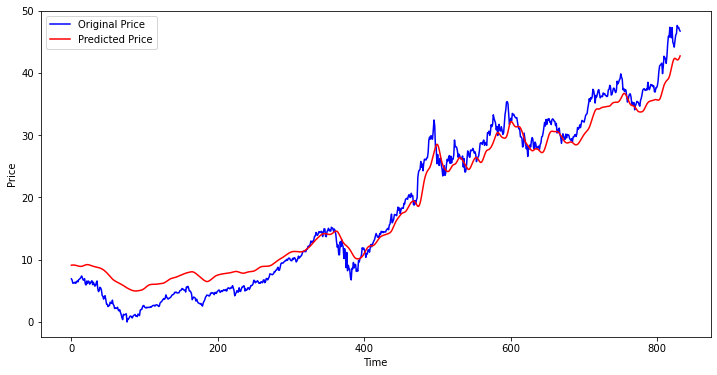

In [82]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()